In [1]:
# This notebook takes output from ProcessingTrain_Test_Data
# Purpose: Use Lasso Regression as a feature selection tool

In [43]:
# Read in train data set and target variable

import pandas as pd
import numpy as np
# Load train data
Training = pd.read_csv('TrainingDataSet_common_features.csv')

# Load test data
Target = pd.read_csv('Target_Variable.csv')

In [18]:
Training.head()

,X189,X185,X184,X187,X186,X181,X180,X183,X182,X291,...,X2_e,X2_d,X2_b,X2_a,X2_n,X2_m,X2_k,X2_j,X2_i,X2_h
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
Target.head()

,y
0,130.81
1,88.53
2,76.26
3,80.62
4,78.02


In [35]:
# Lets save the feature names in a variable 
FeatureName = Training.columns.values


In [36]:
# Import the Lasso library required 

from sklearn.linear_model import Lasso




In [37]:
# This function came from https://chrisalbon.com/machine-learning/lasso_regression_in_scikit.html
# It takes in a list of alphas and returns all the coefficients of the features for each alpha level

def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()

    # Create a column of feature names
    df['Feature Name'] = FeatureName

    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)

        # Fit the lasso regression
        lasso.fit(Predictors, Targets)

        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_

    # Return the datafram    
    return df

In [38]:
# Lets use this function to find the coefficients for alpha values of .1, 1 and 10

# Lets create the X and y array
# First get the values from the panda data frame
Training_array = Training.values
# Now get the features
Predictors = Training_array[:]
# Now get the target
Target_array = Target.values
Targets = Target_array[:,0]

# Now lets create the list of alphas
Alpha = [.1,1,10]



In [39]:
# Now run this

lasso(Alpha)

,Feature Name,Alpha = 0.100000,Alpha = 1.000000,Alpha = 10.000000
0,X189,0.000000,0.000000,0
1,X185,-0.000000,-0.000000,-0
2,X184,0.000000,0.000000,0
3,X187,0.277482,0.000000,0
4,X186,-0.000000,0.000000,-0
5,X181,0.000000,0.000000,-0
6,X180,0.000000,0.000000,0
7,X183,0.000000,0.000000,0
8,X182,0.000000,0.000000,-0
9,X291,-0.000000,-0.000000,-0


In [40]:
# So the idea of a lasso regression is to reduce the magnitude of the weights to avoid over fitting
# The way it does this is by taking the L1 norm (Take the absolute values of the weights, then sum them) and 
# subtracting it from the current coefficient of a feature. This mode of regularisation results in some
# of the weights of the features to become zero and thus drop out of the model
# So this is my rationale for using this as a feature selection tool

# From my analysis of 1, 0.1 and 10, I can see that at different alpha levels, I have different feature weights
# set to 0. Question is which alpha level do I choose as the different alpha levels would have different
# features selected. Hmmmm.

In [42]:
# Lets use cross validation technique to find a suitable alpha value

# The idea is for each alpha value, do the following:
# Divide the data set into a number of sets
# Hide one set, use the other sets to train 
# The use the model to now make predictions on the hidden set
# Report the quality of the predictions for the hidden set
# Repeat this x amount of times and report x amount of metrics

# There is a library that does this called cross_val_score
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

In [ ]:
# This function is from 'https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-
# boosting-gbm-python/. They used the function to tune gradient boosting classification algorithm using the 
# cross validation method

# I modified this algorithm and used it to tune the parameters for my lasso regression 



In [44]:
def modelfit(alg, target, predictors, performCV=True, cv_folds=5):
    
    #Fit the algorithm on the training data
    alg.fit(predictors,target)
        
    #Use the model fitted to predict training set:
    dtrain_predictions = alg.predict(predictors)
    
    # Evaluate the predictions made by this fit
    # The quality control I chose for my fit include mean squared error and R_squared
    MSE=metrics.mean_squared_error(target,dtrain_predictions)
    R_squared = metrics.r2_score(target,dtrain_predictions)
    
    
    # The above code is without any cross validation where all the data is used to train the model.
    # Well we know that leaves us open to overfitting. So to mitigate that, lets do some cross validation
    # Also we will use this CV to tune some of our parameters 
    
    #Perform cross-validation:
    if performCV:
        cv_scoreMSE = cross_validation.cross_val_score(alg, predictors,target, cv=cv_folds, scoring='neg_mean_squared_error')
        cv_scoreR_squared = cross_validation.cross_val_score(alg, predictors,target, cv=cv_folds, scoring='r2')
    
    #Print model report:
    print "\nModel Report"
    print "MSE : %.4g" % MSE
    print "R_squared : %.6g" % R_squared
    
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_scoreMSE),np.std(cv_scoreMSE),np.min(cv_scoreMSE),np.max(cv_scoreMSE))
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_scoreR_squared),np.std(cv_scoreR_squared),np.min(cv_scoreR_squared),np.max(cv_scoreR_squared))

In [45]:
# Now time to fit the first model called Model_Lasso_0
# This is the model with no regularisation at all.
# So the loss function is just the entire RSS
Model_Lasso_0 = Lasso(0)
# Now fit it on the training data set with default settings and a CV of 5
modelfit(Model_Lasso_0,Targets, Predictors)



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1665: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)



Model Report
MSE : 61.12
R_squared : 0.619701
CV Score : Mean - -78.62982 | Std - 22.87884 | Min - -122.2956 | Max - -56.45991
CV Score : Mean - 0.5173398 | Std - 0.06249914 | Min - 0.4006431 | Max - 0.5721799


In [46]:
# So for alpha set at 0, these are our results. 
# So we should try and improve on this or at least do better

In [56]:
# One of the major parameters to tune is the number of trees that are used
# There is no default optimum trees, so we have to tune the number of trees using the parameter n_estimators

# Lets test the number of trees from a range of 20 to 80 in steps of 10
alphas = np.array([0,1])
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(Predictors,Target)
print(grid)

# Lets set some parameters
# We choose a learning rate of 0.1
#gsearch1 = GridSearchCV(estimator = Lasso(),param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5) 

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([0, 1])}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)


//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:619: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  best_estimator.fit(X, y, **self.fit_params)


In [57]:
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: 0.49904, std: 0.03013, params: {'alpha': 0},
  mean: 0.37803, std: 0.02256, params: {'alpha': 1}],
 {'alpha': 0},
 0.4990369254318026)

In [59]:
# Stay away from alpha level of 1 basically. 

# So lets test out a value of 0.1, 0.01 and 0. 
alphas = np.array([0.1,0.01,0])
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(Predictors,Target)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.1 ,  0.01,  0.  ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [60]:
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: 0.54110, std: 0.03828, params: {'alpha': 0.10000000000000001},
  mean: 0.55112, std: 0.03804, params: {'alpha': 0.01},
  mean: 0.49904, std: 0.03013, params: {'alpha': 0.0}],
 {'alpha': 0.01},
 0.5511156569644466)

In [61]:
# At alpha level of 0.01, the R2 went up but then dropped at 0.1
# So our range is 0.01 and .1
# Stay away from alpha level of 1 basically. 

# So lets test out a value between 0.01 and .1
alphas = np.array([0.01,0.05,0.1])
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(Predictors,Target)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.01,  0.05,  0.1 ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [64]:
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: 0.55112, std: 0.03804, params: {'alpha': 0.01},
  mean: 0.55416, std: 0.03788, params: {'alpha': 0.050000000000000003},
  mean: 0.54110, std: 0.03828, params: {'alpha': 0.10000000000000001}],
 {'alpha': 0.050000000000000003},
 0.5541584010459257)

In [67]:
# So lets test out a value in-between 0.025
alphas = np.array([0.01,0.05,0.025])
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(Predictors,Target)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.01 ,  0.05 ,  0.025])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [68]:
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: 0.55112, std: 0.03804, params: {'alpha': 0.01},
  mean: 0.55416, std: 0.03788, params: {'alpha': 0.050000000000000003},
  mean: 0.55682, std: 0.03771, params: {'alpha': 0.025000000000000001}],
 {'alpha': 0.025000000000000001},
 0.5568184564200847)

In [69]:
# The optimum range seems to be between alpha levels 0.05 and 0.025. The increase is not that much
# So lets pick alpha level 0.025 for our lasso regularisation

# Now lets run our lasso program again, this time with alpha at 0.025 and return the coefficients 

In [71]:
# Now lets create the list of alphas
Alpha = [0.025]
FeatureSelectionWithLasso = lasso(Alpha)

In [72]:
FeatureSelectionWithLasso.head()

,Feature Name,Alpha = 0.025000
0,X189,0
1,X185,-0
2,X184,0
3,X187,0
4,X186,-0


In [74]:
# Get all the features that have a negative non-zero coefficient
Model_selection_negative = FeatureSelectionWithLasso[FeatureSelectionWithLasso['Alpha = 0.025000'] < 0]

# Get all the features that have a positive non-zero coefficient
Model_selection_positive = FeatureSelectionWithLasso[FeatureSelectionWithLasso['Alpha = 0.025000'] > 0]

In [75]:
# Lets see the number of the features that are positively correlated with target y
Model_selection_positive.shape

(49, 2)

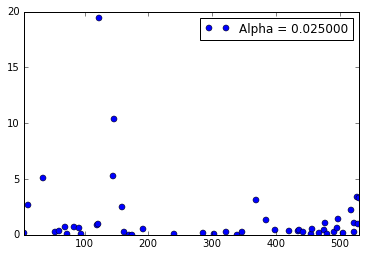

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
Model_selection_positive.plot(style='o')

In [78]:
# Lets see the number of the features that are positively correlated with target y
Model_selection_negative.shape

(46, 2)

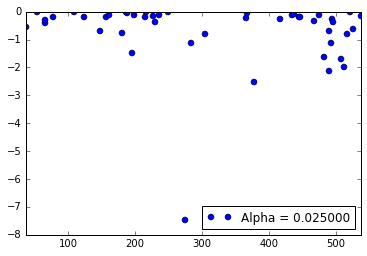

In [79]:
Model_selection_negative.plot(style='o')

In [94]:
# So the features that we are going to keep in our model will be 95 features

# Lets get those

# Lets concatenate both positive and negative 
Features_95 = pd.concat([Model_selection_positive,Model_selection_negative])

# Get the predictor names as a list
Features_95_Names = list(Features_95['Feature Name'])

# Use those predictors to describe the training data set
Training_95_Features = Training[Features_95_Names]


In [95]:
Training_95_Features.head()

,X181,X119,X47,X156,X151,X324,X321,X12,X84,X218,...,X5_w,X5_r,X5_s,X5_l,X0_aj,X0_d,X0_h,X0_o,X0_t,X8_x
0,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Now use these 95 features to also describe the test data set
# Load test data
Test = pd.read_csv('TestDataSet_common_features.csv')
# Use the predcitors identifed by lasso regression to describe the test data set
Test_95_Features = Test[Features_95_Names]

In [97]:
Test_95_Features.head()

,X181,X119,X47,X156,X151,X324,X321,X12,X84,X218,...,X5_w,X5_r,X5_s,X5_l,X0_aj,X0_d,X0_h,X0_o,X0_t,X8_x
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Both train and test seem to be described by the same set of features. So now we can use the train
# data set to come up with a model that we can use to make predictions on the test data set.

# First save both data sets.
Training_95_Features.to_csv('Training_95_Features.csv', sep=',')

Test_95_Features.to_csv('Test_95_Features.csv', sep=',')

In [ ]:
# The algorithm I want to use is the gradient boosting regression algorithm

# Start a new notebook called ModelBuilding_95Features_GBregression